# Figures Bat Signal Masks
Generate the figures for the paper using the masks computed in ```demo_bat_signal.m```.

In [1]:
import numpy as np
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean

from src.utilstf import *
from mcsm_benchs.SignalBank import SignalBank
from mcsm_benchs.MatlabInterface import MatlabInterface


import sys
import os
import matlab.engine

In [2]:
# Load the signal
# Import a .mat file from Matlab where the signal is stored.
filename = './batsig.mat'
batsignal = loadmat(filename)
x = batsignal['batsig'][:,0]
N = len(x)
Ncomps = 3
Sbatsig, Fbatsig= get_spectrogram(x,)
sf= 1

Text(0.5, -18.27777777777778, 'time')

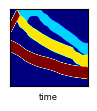

In [3]:
# EM method
filename = './mask_EM.mat'
matfile = loadmat(filename)
mask = matfile['mask_EM']

fig, ax = plt.subplots(1,1, figsize=(sf,sf))
ax.imshow(mask, origin='lower', aspect='auto', cmap='jet')


# ax.set_xlim([0,400])
# ax.set_ylim([0,400])
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
# ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)

# fig.savefig('batsig_EM_mask.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  

Text(0.5, -18.27777777777778, 'time')

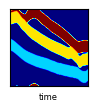

In [4]:
# PB method without SST
filename = './mask_PB.mat'
matfile = loadmat(filename)
mask = matfile['mask_PB']

fig, ax = plt.subplots(1,1, figsize=(sf,sf))
ax.imshow(mask, origin='lower', aspect='auto', cmap='jet')


# ax.set_xlim([0,400])
# ax.set_ylim([0,400])
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
# ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)

# fig.savefig('batsig_PB_mask.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  

Text(0.5, -18.27777777777778, 'time')

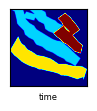

In [5]:
# DT method with analytic signal IF model 
from src.methods.method_delaunay_triangulation import NewMethod
dt_method = NewMethod().method
output_dict = dt_method(x, grouping=True, ngroups=3, LB = 1.75, return_dic=True)
mask = output_dict['mask']
group_masks = output_dict['group_masks']
mask = sum([m*(i+1) for i,m in enumerate(group_masks)])
fig, ax = plt.subplots(1,1,figsize=(sf,sf))
ax.imshow(mask, origin='lower', cmap='jet')
ax.set_xlim([0,400])
ax.set_ylim([0,400])
# ax.axis('off')
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
# ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)

# fig.savefig('batsig_DT_1_mask.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  

Text(0.5, -18.27777777777778, 'time')

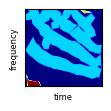

In [6]:
# DT method with analytic signal IF model 
from src.methods.method_delaunay_triangulation import NewMethod
dt_method = NewMethod().method
output_dict = dt_method(x, grouping=True, ngroups=3, LB = 1.45, return_dic=True)
mask = output_dict['mask']
group_masks = output_dict['group_masks']
mask = sum([m*(i+1) for i,m in enumerate(group_masks)])
fig, ax = plt.subplots(1,1,figsize=(sf,sf))
ax.imshow(mask, origin='lower', cmap='jet')
ax.set_xlim([0,400])
ax.set_ylim([0,400])
# ax.axis('off')
fig.canvas.draw()
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
    labelbottom=False, right=False, left=False, labelleft=False)
ax.set_ylabel('frequency', fontsize=6.0)
ax.set_xlabel('time', fontsize=6.0)

# fig.savefig('batsig_DT_2_mask.pdf', dpi=900, transparent=False, bbox_inches='tight', pad_inches=0)  